# Importing Libraries

In [1]:
import numpy as np
from scipy.sparse import load_npz

import sys
sys.path.append("../")
from CustomFunctions import Train_Classifiers, CrossValidateClassifiers

C:\Users\Prash\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Importing Data

In [3]:
y = np.load("../Data/Text/TF-IDF/labels.npy")
caplength = np.load("../Data/Text/TF-IDF/caplength.npy")
totalhashtags = np.load("../Data/Text/TF-IDF/totalhash.npy")

## TF-IDF

In [4]:
tweets_tfidf = load_npz("../Data/Text/TF-IDF/captions.npz")
hashtags_tfidf = load_npz("../Data/Text/TF-IDF/hashtags.npz")

## BERT

In [5]:
tweets_bert = np.load("../Data/Text/BERT/captions.npy")
hashtags_bert = np.load("../Data/Text/BERT/hashtags.npy")

# Initial Modelling

## TF-IDF

In [6]:
models = {
  'Logistic Regression': LogisticRegression(),
  'Decision Tree': DecisionTreeClassifier(),
  'KNN': KNeighborsClassifier(),
  'Multinomial Naive Bayes': MultinomialNB(),
  'Gaussian Naive Bayes': GaussianNB(),
  'SVC': SVC(),
  'AdaBoost': AdaBoostClassifier(),
  'Gradient Boosting': GradientBoostingClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier(),
  'CatBoost': CatBoostClassifier(task_type='GPU'),
  'LightGBM': LGBMClassifier()
}

### Initializing

In [7]:
tfidf_initial = Train_Classifiers(tweets_tfidf, y, models)

### Training

In [8]:
tfidf_initial.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 0.798 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 3.179 seconds
------------------
Training KNN
KNN Model Trained
Time taken = 0.001 seconds
------------------
Training Multinomial Naive Bayes
Multinomial Naive Bayes Model Trained
Time taken = 0.003 seconds
------------------
Training Gaussian Naive Bayes
Gaussian Naive Bayes Model Trained
Time taken = 1.44 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 3.004 seconds
------------------
Training AdaBoost
AdaBoost Model Trained
Time taken = 6.464 seconds
------------------
Training Gradient Boosting
Gradient Boosting Model Trained
Time taken = 104.77 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 30.805 seconds
------------------
Training XGBoost
XGBoost Model Trained
Time taken = 3.173 seconds
------------------
Training CatBoost
Learning rate set t

### Comparing accuracy

In [9]:
tfidf_initial.score()

Logistic Regression: 0.6765913757700205
Decision Tree: 0.5924024640657084
KNN: 0.5359342915811088
Multinomial Naive Bayes: 0.6457905544147844
Gaussian Naive Bayes: 0.4887063655030801
SVC: 0.6714579055441479
AdaBoost: 0.5862422997946611
Gradient Boosting: 0.662217659137577
Random Forest: 0.6673511293634496
XGBoost: 0.6776180698151951
CatBoost: 0.7084188911704312
LightGBM: 0.608829568788501


### Comparing confusion matrices

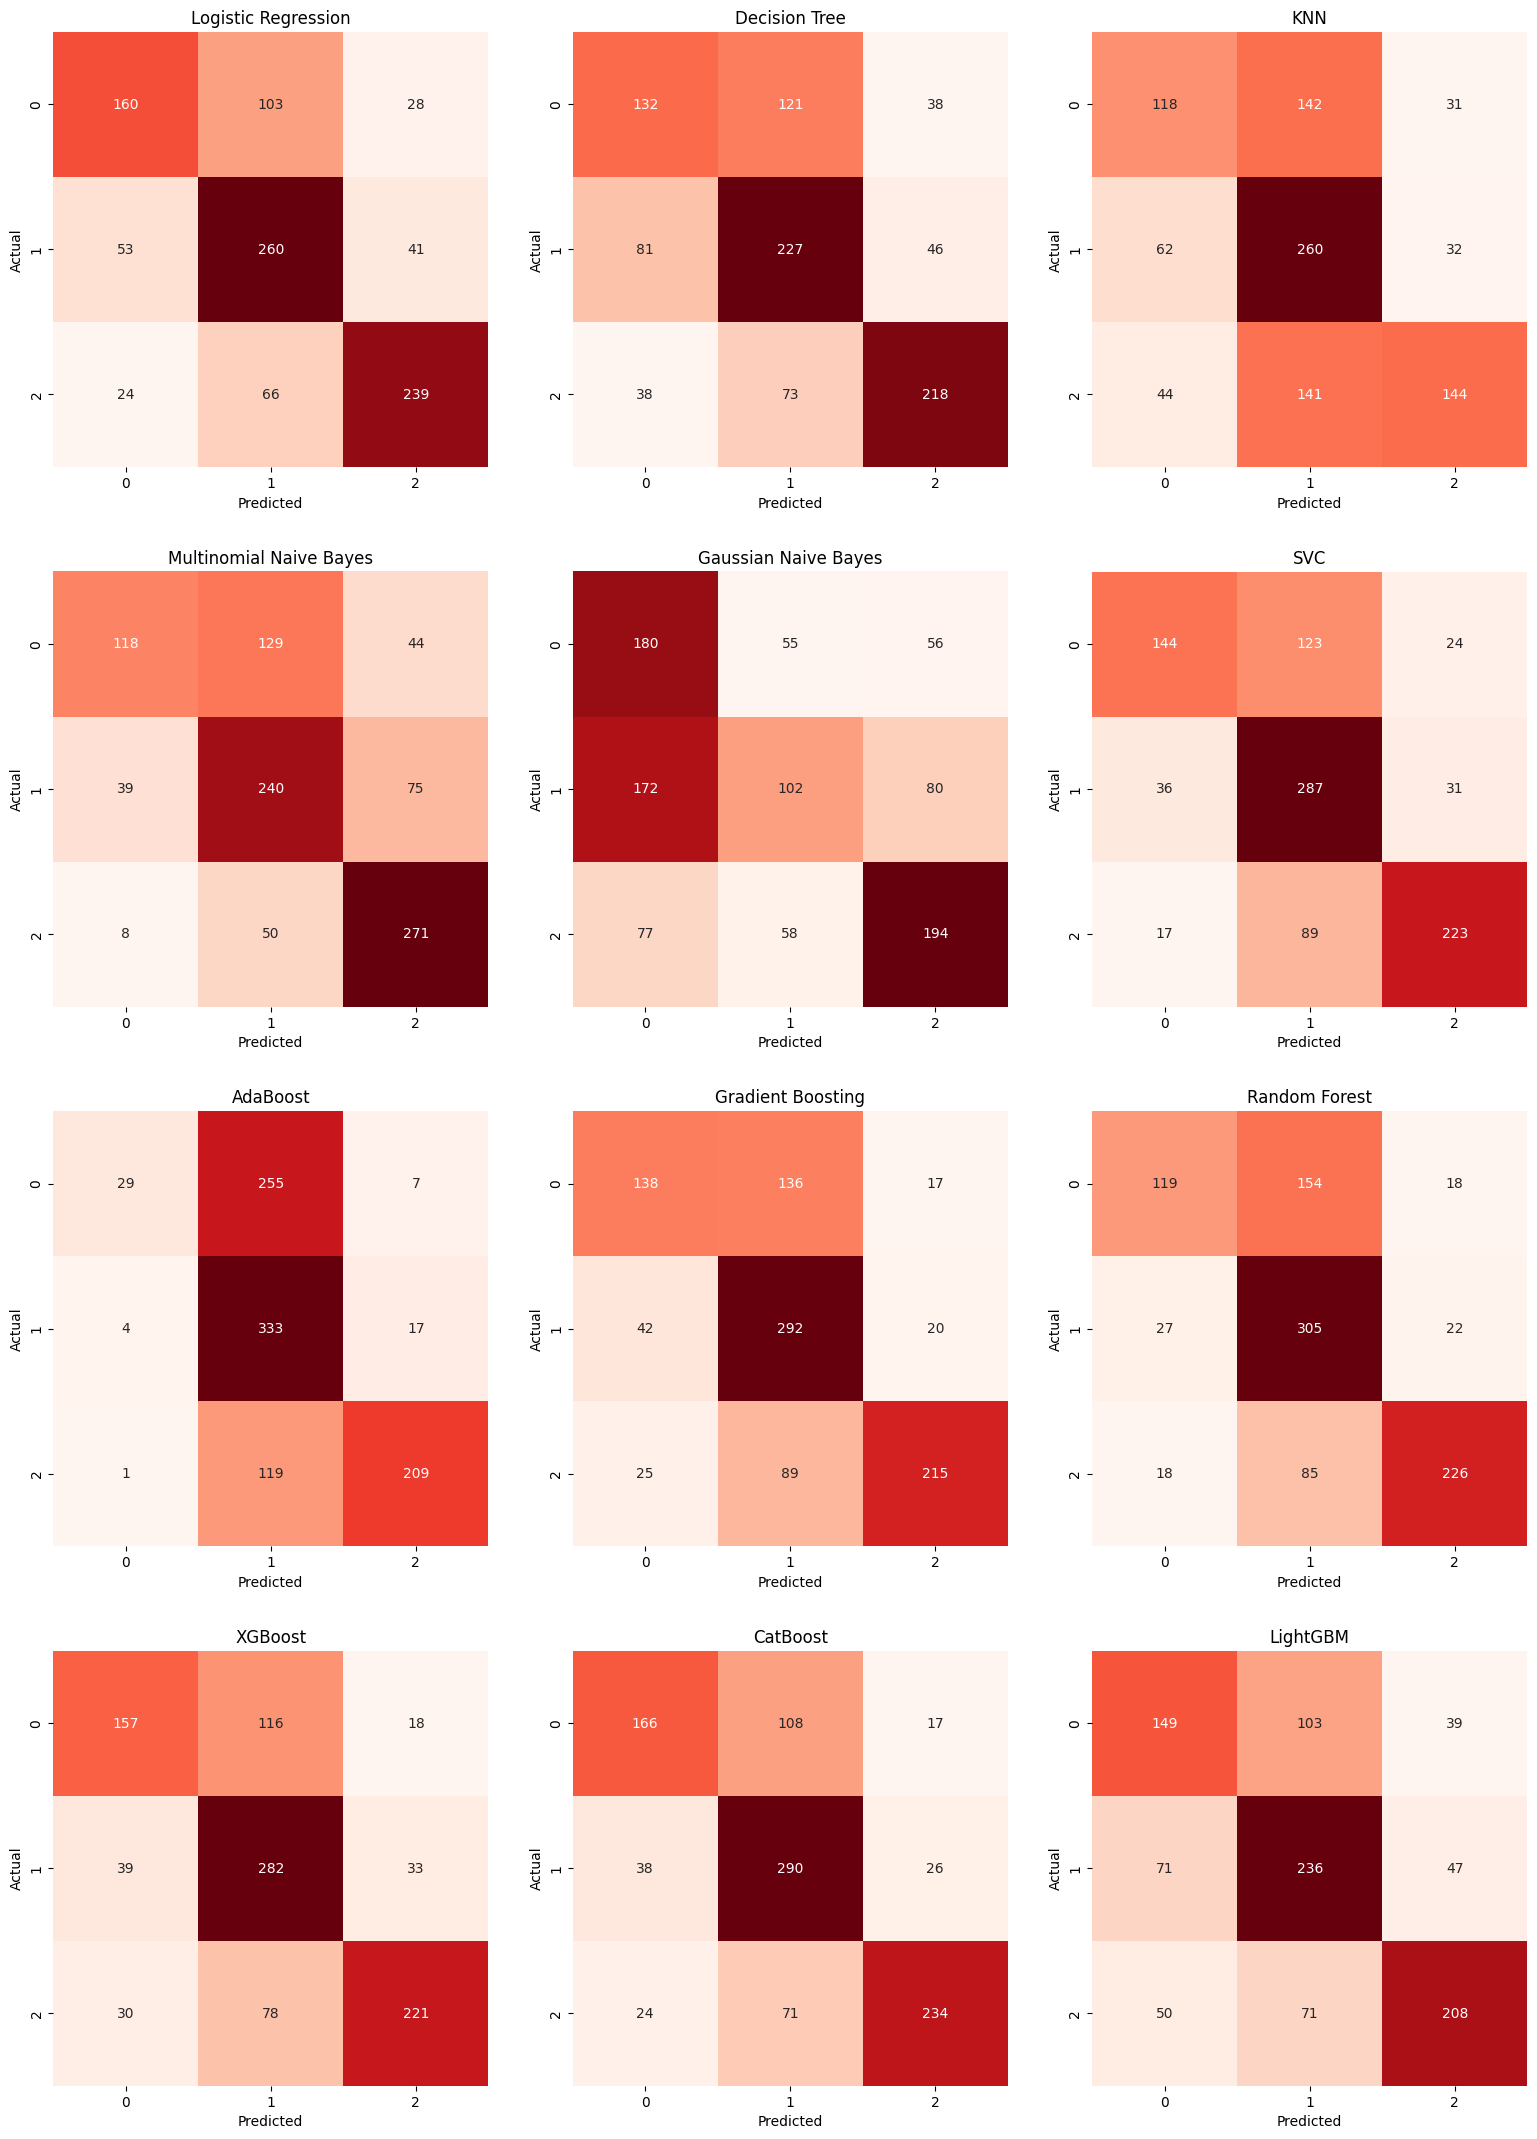

In [10]:
tfidf_initial.Compare_ConfusionMatrices()

### Comparing overall performance

In [11]:
tfidf_initial.Compare_Performance()

,Name,Accuracy,AUC,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,f1-score_0,f1-score_1,f1-score_2
0,Logistic Regression,0.677,0.852,0.675,0.606,0.776,0.550,0.734,0.726,0.606,0.664,0.750
1,Decision Tree,0.592,0.690,0.526,0.539,0.722,0.454,0.641,0.663,0.487,0.586,0.691
2,KNN,0.536,0.723,0.527,0.479,0.696,0.405,0.734,0.438,0.458,0.580,0.537
3,Multinomial Naive Bayes,0.646,0.844,0.715,0.573,0.695,0.405,0.678,0.824,0.518,0.621,0.754
4,Gaussian Naive Bayes,0.489,0.624,0.420,0.474,0.588,0.619,0.288,0.590,0.500,0.359,0.589
5,SVC,0.671,NaN,0.731,0.575,0.802,0.495,0.811,0.678,0.590,0.673,0.735
6,AdaBoost,0.586,0.703,0.853,0.471,0.897,0.100,0.941,0.635,0.178,0.628,0.744
7,Gradient Boosting,0.662,0.824,0.673,0.565,0.853,0.474,0.825,0.653,0.556,0.670,0.740
8,Random Forest,0.667,0.859,0.726,0.561,0.850,0.409,0.862,0.687,0.523,0.679,0.760
9,XGBoost,0.678,0.842,0.695,0.592,0.812,0.540,0.797,0.672,0.607,0.680,0.735


## BERT

### Initializing

In [16]:
bert_initial = Train_Classifiers(tweets_bert, y, models)

### Training

In [17]:
bert_initial.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 0.621 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 7.497 seconds
------------------
Training KNN
KNN Model Trained
Time taken = 0.002 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 5.954 seconds
------------------
Training AdaBoost
AdaBoost Model Trained
Time taken = 45.842 seconds
------------------
Training Gradient Boosting
Gradient Boosting Model Trained
Time taken = 796.775 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 23.001 seconds
------------------
Training XGBoost
XGBoost Model Trained
Time taken = 47.608 seconds
------------------
Training CatBoost
Learning rate set to 0.085654
0:	learn: 1.0829728	total: 35.3ms	remaining: 35.3s
1:	learn: 1.0698602	total: 65.3ms	remaining: 32.6s
2:	learn: 1.0563816	total: 95.5ms	remaining: 31.7s
3:	learn: 1.0448345	total: 125ms	remaining: 31s
4:	learn: 1.

### Comparing Accuracy

In [18]:
bert_initial.score()

Logistic Regression: 0.6006160164271047
Decision Tree: 0.46098562628336753
KNN: 0.5277207392197125
SVC: 0.6129363449691991
AdaBoost: 0.5420944558521561
Gradient Boosting: 0.6180698151950719
Random Forest: 0.5913757700205339
XGBoost: 0.6396303901437371
CatBoost: 0.6529774127310062
LightGBM: 0.6262833675564682


### Comparing confusion matrices

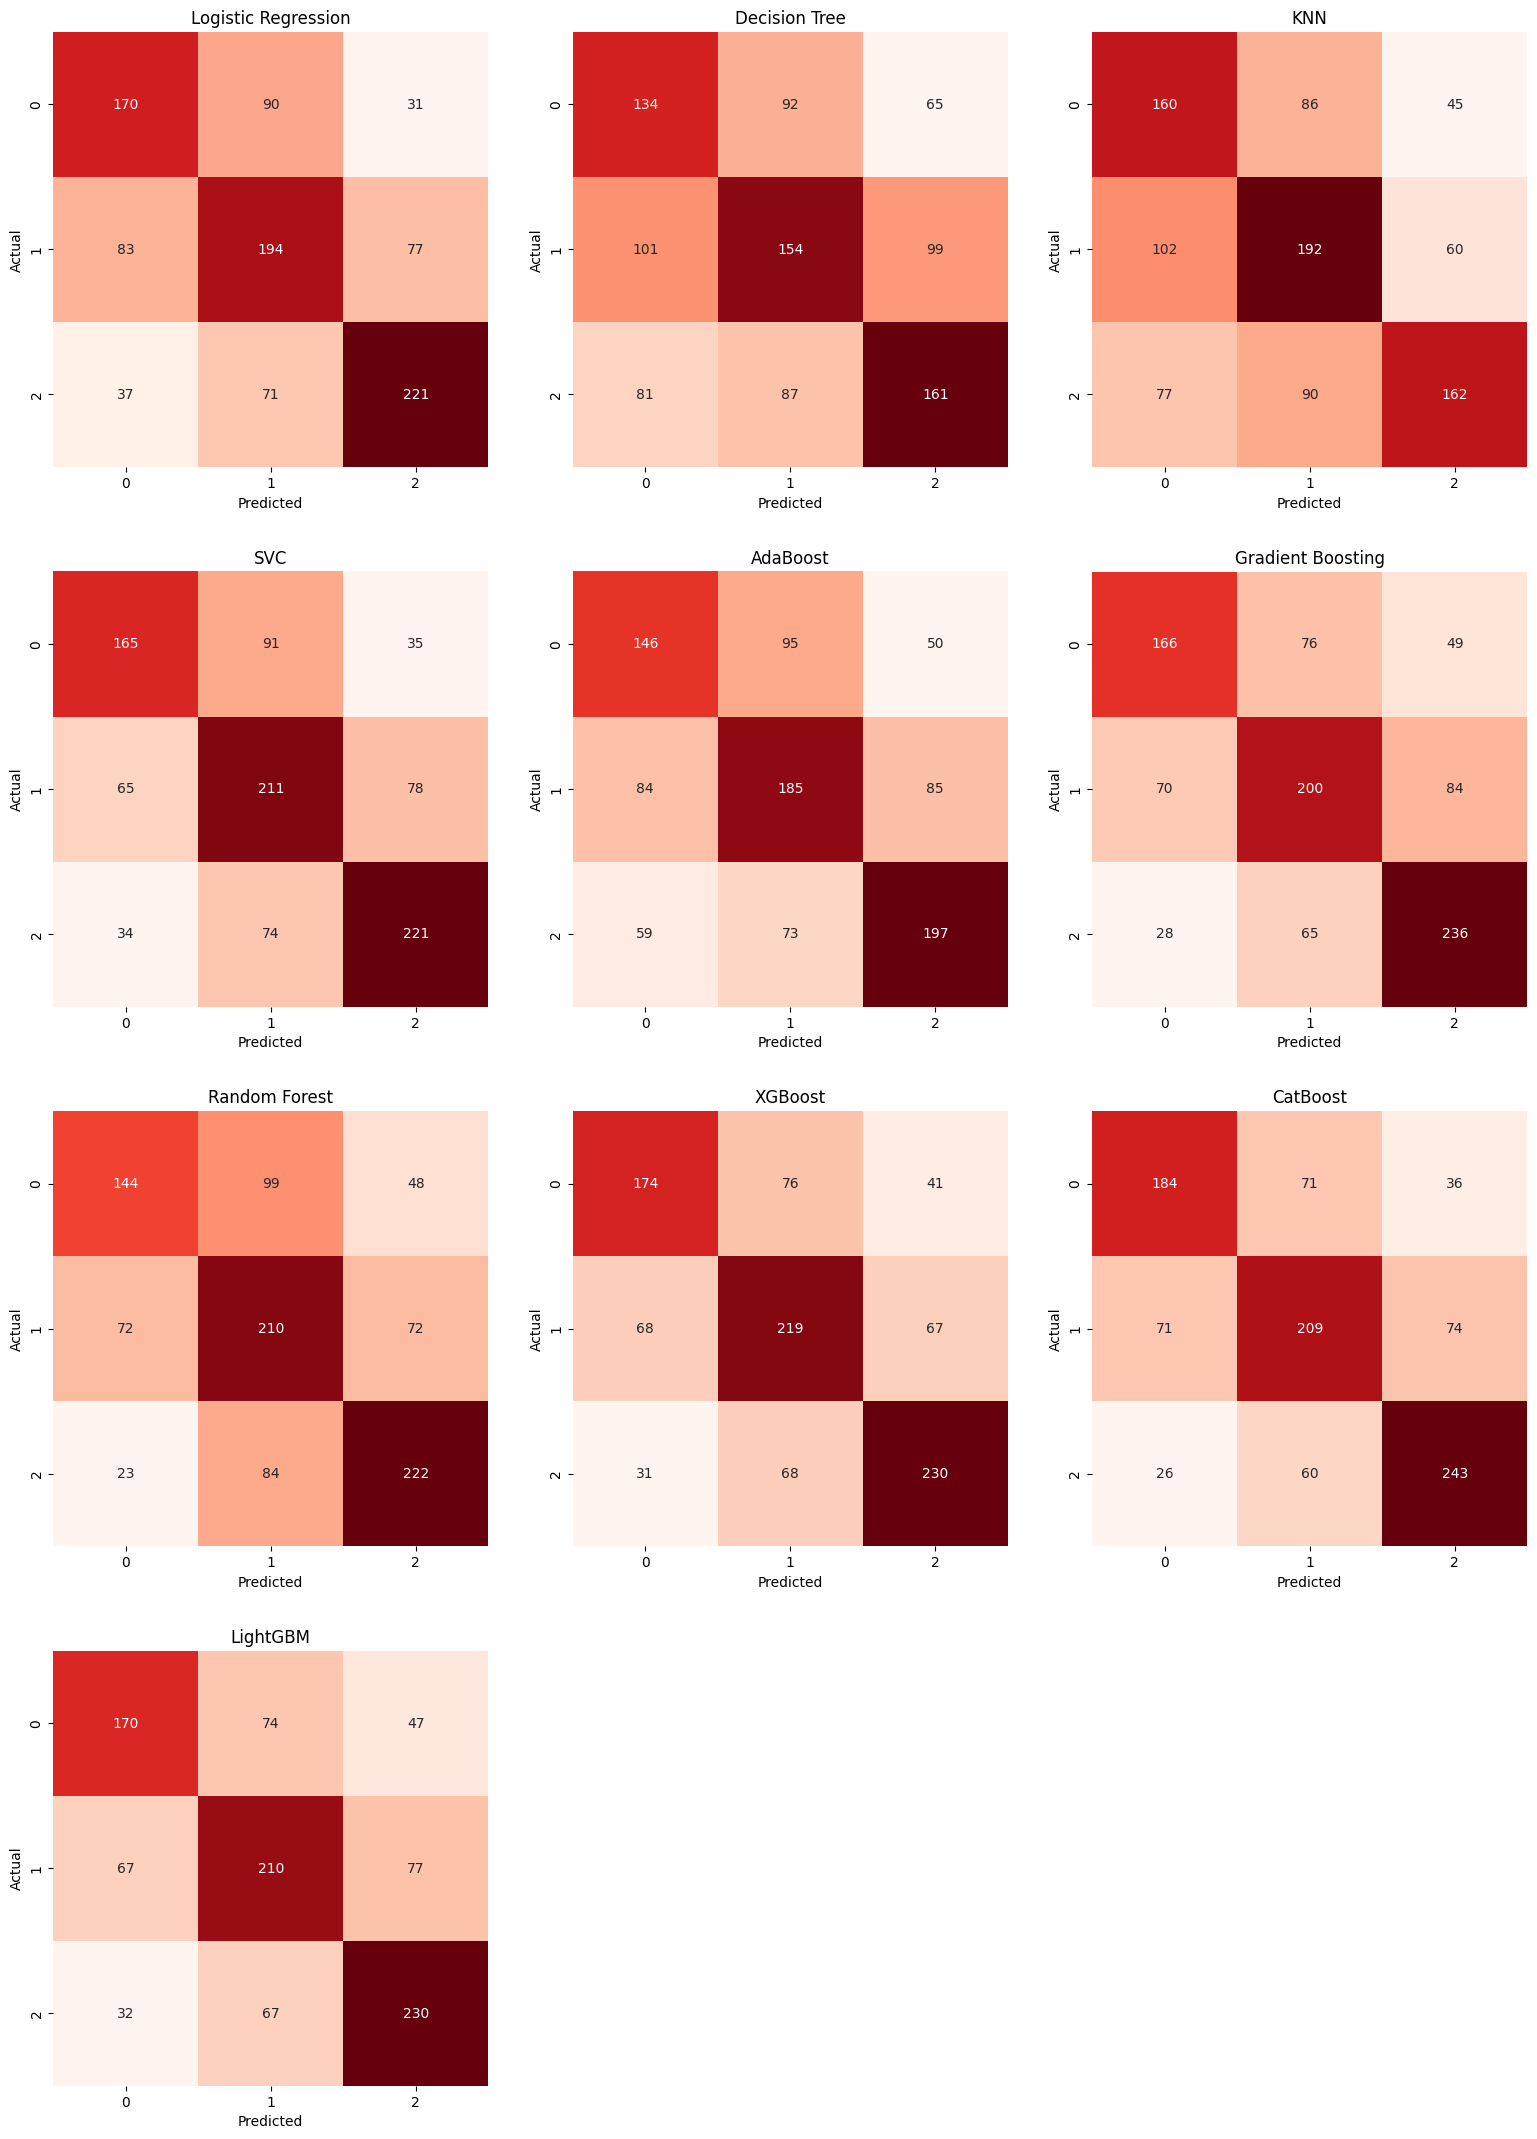

In [19]:
bert_initial.Compare_ConfusionMatrices()

### Compariong overall performance

In [21]:
bert_initial.Compare_Performance()

,Name,Accuracy,AUC,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,f1-score_0,f1-score_1,f1-score_2
0,Logistic Regression,0.601,0.783,0.586,0.546,0.672,0.584,0.548,0.672,0.585,0.547,0.672
1,Decision Tree,0.461,0.596,0.424,0.462,0.495,0.460,0.435,0.489,0.442,0.448,0.492
2,KNN,0.528,0.707,0.472,0.522,0.607,0.550,0.542,0.492,0.508,0.532,0.544
3,SVC,0.613,NaN,0.625,0.561,0.662,0.567,0.596,0.672,0.595,0.578,0.667
4,AdaBoost,0.542,0.712,0.505,0.524,0.593,0.502,0.523,0.599,0.503,0.523,0.596
5,Gradient Boosting,0.618,0.789,0.629,0.587,0.640,0.570,0.565,0.717,0.598,0.576,0.676
6,Random Forest,0.591,0.783,0.603,0.534,0.649,0.495,0.593,0.675,0.543,0.562,0.662
7,XGBoost,0.640,0.810,0.637,0.603,0.680,0.598,0.619,0.699,0.617,0.611,0.690
8,CatBoost,0.653,0.821,0.655,0.615,0.688,0.632,0.590,0.739,0.643,0.602,0.713
9,LightGBM,0.626,0.813,0.632,0.598,0.650,0.584,0.593,0.699,0.607,0.596,0.673


# Cross Validating

In [6]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'CatBoostClassifier': CatBoostClassifier()
}

## TF-IDF

In [7]:
CrossValidateClassifiers(models, tweets_tfidf, y)

For LogisticRegression
Test Scores = [0.63552361 0.62217659 0.60985626 0.63347023 0.64542652]
Mean Test Score = 0.6292906419950575
Time taken = 2.506 seconds

For SVC
Test Scores = [0.63039014 0.60780287 0.5862423  0.59548255 0.65775951]
Mean Test Score = 0.6155354742313512
Time taken = 6.089 seconds

For MultinomialNB
Test Scores = [0.6036961  0.57084189 0.58521561 0.66735113 0.67523124]
Mean Test Score = 0.620467193273835
Time taken = 0.034 seconds

For RandomForestClassifier
Test Scores = [0.62422998 0.56776181 0.58008214 0.60164271 0.63001028]
Mean Test Score = 0.6007453819871647
Time taken = 48.517 seconds

For XGBClassifier
Test Scores = [0.64681725 0.59548255 0.6026694  0.65811088 0.64953751]
Mean Test Score = 0.6305235189964778
Time taken = 12.593 seconds

For LGBMClassifier
Test Scores = [0.57802875 0.55441478 0.52156057 0.57084189 0.61356629]
Mean Test Score = 0.5676824571437014
Time taken = 1.994 seconds

For CatBoostClassifier
Test Scores = [0.65605749 0.60574949 0.61909651

## BERT

In [8]:
CrossValidateClassifiers(models, tweets_bert, y)

For LogisticRegression
Test Scores = [0.57597536 0.57289528 0.58521561 0.61293634 0.62384378]
Mean Test Score = 0.5941732738772314
Time taken = 2.985 seconds

For SVC
Test Scores = [0.57700205 0.56570842 0.58932238 0.63552361 0.61151079]
Mean Test Score = 0.5958134519078783
Time taken = 26.574 seconds

For MultinomialNB
Test Scores = [0.50513347 0.48562628 0.53285421 0.50513347 0.49537513]
Mean Test Score = 0.5048245123467081
Time taken = 0.433 seconds

For RandomForestClassifier
Test Scores = [0.57289528 0.53593429 0.53593429 0.59034908 0.59403905]
Mean Test Score = 0.5658303981631357
Time taken = 50.077 seconds

For XGBClassifier
Test Scores = [0.59342916 0.55544148 0.54209446 0.59856263 0.61151079]
Mean Test Score = 0.5802077024212252
Time taken = 269.039 seconds

For LGBMClassifier
Test Scores = [0.58213552 0.55749487 0.5513347  0.61704312 0.62589928]
Mean Test Score = 0.5867814988255803
Time taken = 45.297 seconds

For CatBoostClassifier
Test Scores = [0.59548255 0.55749487 0.5687